Download fraud data in JSON format
Divide into a 2D x values list and a y values list
Build a decision tree
http://dgoldberg.sdsu.edu/515/fraud_data.json

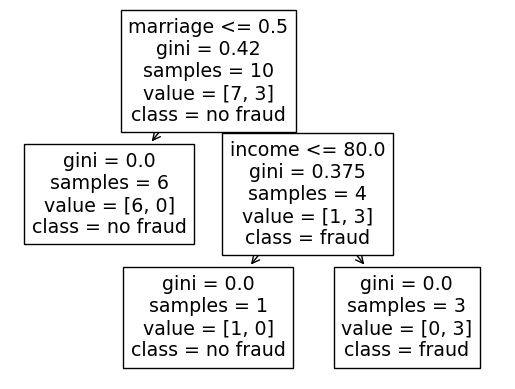

In [ ]:
import json, sklearn.tree, requests, matplotlib, matplotlib.pyplot as plt
response = requests.get("http://dgoldberg.sdsu.edu/515/fraud_data.json")
if response:
  data = json.loads(response.text)

  x = []
  y = []

  for line in data:
    refund = line['refund']
    income = line['income']
    marriage = line['marriage']
    fraud = line['fraud']

    inner_list = [refund, income, marriage]
    x.append(inner_list)

    y.append(fraud)

  clf = sklearn.tree.DecisionTreeClassifier()
  clf.fit(x,y)

  sklearn.tree.plot_tree(clf, feature_names = ["refund", "income", "marriage"], class_names = ["no fraud", "fraud"])
  plt.show()

Download NFL game data
Separate data into 80-20 test-train split
Determine accuracy of model
https://dgoldberg.sdsu.edu/515/nfl_data_full.json

In [ ]:
import sklearn.tree, json, requests, sklearn.model_selection, sklearn.metrics
response = requests.get("https://dgoldberg.sdsu.edu/515/nfl_data_full.json")

if response:
  data = json.loads(response.text)

  x = []
  y = []

  for line in data:
    yard_differential = line['yard_differential']
    turnover_differential = line ['turnover_differential']
    win = line['win']
    inner_list = [yard_differential, turnover_differential]

    x.append(inner_list)
    y.append(win)

  x_test, x_train, y_test, y_train = sklearn.model_selection.train_test_split(x,y, test_size=0.2)

  clf = sklearn.tree.DecisionTreeClassifier()
  clf.fit(x_train,y_train)

  predictions = clf.predict(x_test)

  accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
  print(accuracy)




0.733505517727166


Download wine data in JSON format
Based on chemical properties, predict if wine is "elite"
Build multiple machine learning models to compare
https://dgoldberg.sdsu.edu/515/wine_data.json

In [ ]:
import json, sklearn.metrics, requests, sklearn.tree, joblib
response = requests.get("https://dgoldberg.sdsu.edu/515/wine_data.json")

if response:
  data = json.loads(response.text)

  x = []
  y = []

  for line in data:
    volatile_acidity = line['volatile_acidity']
    free_sulfur_dioxide = line['free_sulfur_dioxide']
    ph = line['pH']
    alcohol = line['alcohol']
    elite_quality = line['elite_quality']
    inner_list = [volatile_acidity,free_sulfur_dioxide,ph,alcohol]
    x.append(inner_list)
    y.append(elite_quality)

  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.2)

  clf = sklearn.tree.DecisionTreeClassifier()
  clf.fit(x_train,y_train)

  predictions = clf.predict(x_test)
  accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
  print(accuracy)

  predictions = clf.predict(x_test)
  accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
  print(accuracy)
  joblib.dump(clf, "decision_tree.joblib")

0.8231132075471698
0.8231132075471698



Download heart disease data
Split data into training and testing
Determine accuracy of model
Add a confusion matrix
https://dgoldberg.sdsu.edu/515/heart.json

0.75


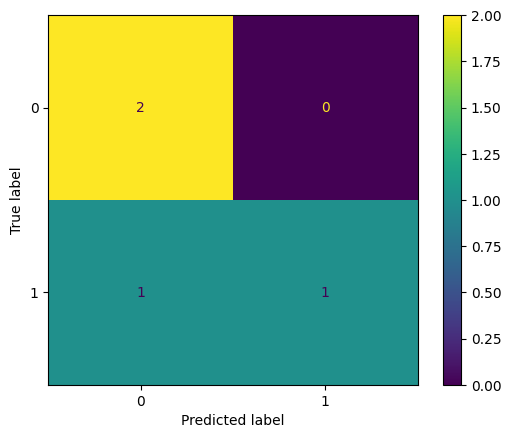

In [ ]:
import json, requests, sklearn.tree, sklearn.metrics, joblib, matplotlib.pyplot as plt
response = requests.get("https://dgoldberg.sdsu.edu/515/heart.json")

if response:
  data = json.loads(response.text)

  x = []
  y = []

  for line in data:
    age = line['age']
    chol = line['chol']
    heart = line['heart']

    inner_list = [age,chol]
    x.append(inner_list)
    y.append(heart)

  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size = 0.2)

  clf = sklearn.tree.DecisionTreeClassifier()
  clf.fit(x_train,y_train)

  predictions = clf.predict(x_test)

  accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
  print(accuracy)

  cm = sklearn.metrics.confusion_matrix(y_test, predictions)
  disp = sklearn.metrics.ConfusionMatrixDisplay(cm)

  joblib.dump(clf, "decision_tree1.joblib")

  disp.plot()
  plt.show()

# Vectorize Kickstarter pitches
# Use a neural network to predict funding status
# Print out classification report
# https://dgoldberg.sdsu.edu/515/kickstarter_data_1k.json

In [ ]:
import json, sklearn.neural_network, requests, sklearn.metrics, sklearn.feature_extraction.text
response = requests.get("https://dgoldberg.sdsu.edu/515/kickstarter_data_1k.json")

if response:
  data = json.loads(response.text)
  x=[]
  y=[]
  for line in data:
    post = line["Post"]
    funded = line["Funded"]

    x.append(post)
    y.append(funded)

  vectorizer = sklearn.feature_extraction.text.CountVectorizer()
  vectors = vectorizer.fit_transform(x)
  x = vectors.toarray()

  x_train, x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y)

  clf = sklearn.neural_network.MLPClassifier()
  clf = clf.fit(x_train,y_train)

  predictions = clf.predict(x_test)
  accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
  print(accuracy)

  print(sklearn.metrics.classification_report(y_test, predictions))



0.72
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       117
           1       0.73      0.75      0.74       133

    accuracy                           0.72       250
   macro avg       0.72      0.72      0.72       250
weighted avg       0.72      0.72      0.72       250



Download review data in JSON format
Based on text, predict if the products are safety hazards
Build multiple machine learning models to compare
https://dgoldberg.sdsu.edu/515/appliance_reviews.json

In [ ]:
import json, requests, sklearn.tree, nltk, sklearn.metrics, sklearn.feature_extraction.text
nltk.download("stopwords")
from nltk.corpus import stopwords

response = requests.get(" https://dgoldberg.sdsu.edu/515/appliance_reviews.json")

if response:
  data = json.loads(response.text)
  x = []
  y = []

  for line in data:
    review = line["Review"]
    safety_hazard = line["Safety hazard"]

    x.append(review)
    y.append(safety_hazard)

  vectorizer = sklearn.feature_extraction.text.CountVectorizer(stopwords = stopwords.words("english"))
  vectors = vectorizer.fit_transform(x)
  xx=vectors.toarray()

  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y)
  clf = sklearn.tree.DecisionTreeClassifier()
  clf.fit(x_train,y_train)

  clf = sklearn.neighbors.KNeighborsClassifier(3)
  clf.fit(x_train,y_train)

  predictions = clf.predict(x_test)
  accuracy = sklearn.metrics.accuracy_score(y_test, predictions)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0.98



Create a class for CreditCard
Use attributes name (string) and number (integer)
Use type hints
If a credit card is printed, print the name and number
If two credit cards are compared, determine if they are the same with ==

In [ ]:
class CreditCard:
  def __init__(self, name, number):
    self.name = name
    self.number = number

  def __eq__(self, other):
    if self.number == other.number:
      return True
    else:
      return False

cc1 = CreditCard("john", 12345)
cc2 = CreditCard("amy", 12345)

if cc1 == cc2:
  print("same")
else:
  print("diff")

same


Use decision tree model (joblib) to predict new cases
https://dgoldberg.sdsu.edu/515/heart2.json

In [ ]:
import joblib, json, requests, sklearn.tree
response = requests.get("https://dgoldberg.sdsu.edu/515/heart2.json")

if response:
  data = json.loads(response.text)
  x= []

  for line in data:
    age = line["age"]
    chol = line["chol"]

    inner_list = [age,chol]
    x.append(inner_list)

  joblib.load("decision_tree1.joblib")

  predictions = clf.predict(x)
  print(predictions)

[1 1 1 0 0 0 1 0 0 1]


(a)

Use K-Means to create groupings for customer spending data
Experiment with values of K
Look at labels and centroids
https://dgoldberg.sdsu.edu/515/spending_data.json
(b)

Add a color-coded matplotlib visualization
Each color reflects a different cluster
(c)

Check silhouette scores for the K-Means problem
Use K = 2 to K = 10

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


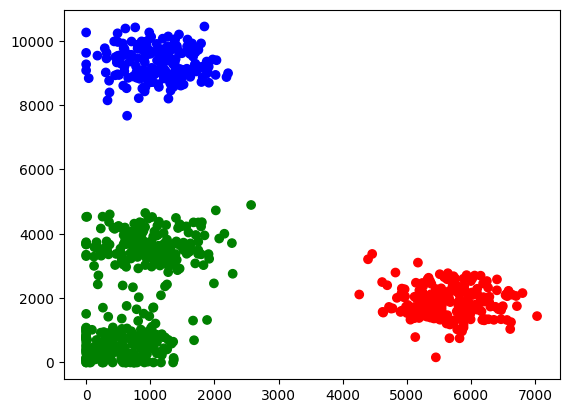

0.7139665660918021


In [ ]:
import sklearn.cluster, json, requests, matplotlib.pyplot as plt, sklearn.metrics
response = requests.get("https://dgoldberg.sdsu.edu/515/spending_data.json")

if response:
  data = json.loads(response.text)

  x=[]
  elect=[]
  groc=[]
  house=[]
  for line in data:
    electronics = line["Electronics"]
    groceries = line["Groceries"]
    household = line["Household items"]
    inner_list = [electronics,groceries,household]
    x.append(inner_list)

    elect.append(electronics)
    groc.append(groceries)
    house.append(household)

  kmeans = sklearn.cluster.KMeans(3)
  kmeans = kmeans.fit(x)

  colors = []
  for label in kmeans.labels_:
    if label ==0:
      colors.append("red")
    elif label ==1:
      colors.append("blue")
    else:
      colors.append("green")

  plt.scatter(elect, house, color=colors)
  plt.show()

  #silhouette
  sil = sklearn.metrics.silhouette_score(x, kmeans.labels_)
  print(sil)

# Create a K-Means model for banking data
# Experiment with K = 2 to K = 10
# https://dgoldberg.sdsu.edu/515/banking_data.json

In [ ]:
import json, requests, sklearn.cluster, matplotlib.pyplot as plt, sklearn.metrics
response = requests.get("https://dgoldberg.sdsu.edu/515/banking_data.json")
if response:
  data = json.loads(response.text)
  x=[]
  for line in data:
    checkings = line["checking"]
    savings = line["savings"]
    inner_list =[checkings,savings]
    x.append(inner_list)

  for k in range(2,11):
    kmeans = sklearn.cluster.KMeans(k)
    kmeans = kmeans.fit(x)
    sil = sklearn.metrics.silhouette_score(x,kmeans.labels_)
    print(k, sil)

  kmeans = sklearn.cluster.KMeans(2)
  kmeans.fit(x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 0.5680850253970046


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 0.6294103637858747


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 0.7049000875913312


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 0.7467997628587142
6 0.6476553855696144


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 0.569439599105896
8 0.47266419941215304


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 0.4922220544769062
10 0.33432534732030716


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
